# Introduction

The World Development Indicators dataset from the World Bank looks at over a thousand economic development indicators for hundreds of countries across the world. Let's jump in and look at some exploratory data analysis.

Source: https://www.kaggle.com/datasets/kaggle/world-development-indicators?select=Country.csv

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [23]:
# only read csv if pickled dataframe is not available
pickled = True

if pickled == False:
    # read the data into a dataframe
    data = pd.read_csv('./data/Indicators.csv')
    # how large is this dataset?
    data.shape
    # pickle the dataframe for faster load times later
    with open('./data/Indicators.pkl', 'wb') as f:
        pickle.dump(data, f)

In [24]:
# read pickled dataframe
with open('./data/Indicators.pkl', 'rb') as f:
    data = pickle.load(f)

In [6]:
# what do the columns look like?
data.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06


In [7]:
# let's explore the countries and indicators
countries = data['CountryName'].unique().tolist()
indicators = data['IndicatorName'].unique().tolist()

How many different indicators are in the dataset? And how many countries?

In [8]:
print(len(indicators))
print(len(countries))

1344
247


That's a lot of indicators. Let's print them line by line here to easily find the most interesting ones.

In [9]:
print(*indicators, sep = "\n")

Adolescent fertility rate (births per 1,000 women ages 15-19)
Age dependency ratio (% of working-age population)
Age dependency ratio, old (% of working-age population)
Age dependency ratio, young (% of working-age population)
Arms exports (SIPRI trend indicator values)
Arms imports (SIPRI trend indicator values)
Birth rate, crude (per 1,000 people)
CO2 emissions (kt)
CO2 emissions (metric tons per capita)
CO2 emissions from gaseous fuel consumption (% of total)
CO2 emissions from liquid fuel consumption (% of total)
CO2 emissions from liquid fuel consumption (kt)
CO2 emissions from solid fuel consumption (% of total)
Death rate, crude (per 1,000 people)
Fertility rate, total (births per woman)
Fixed telephone subscriptions
Fixed telephone subscriptions (per 100 people)
Hospital beds (per 1,000 people)
International migrant stock (% of population)
International migrant stock, total
Life expectancy at birth, female (years)
Life expectancy at birth, male (years)
Life expectancy at birth,

Let's also print the countries to see the scope.

In [10]:
print(*countries, sep = "\n")

Arab World
Caribbean small states
Central Europe and the Baltics
East Asia & Pacific (all income levels)
East Asia & Pacific (developing only)
Euro area
Europe & Central Asia (all income levels)
Europe & Central Asia (developing only)
European Union
Fragile and conflict affected situations
Heavily indebted poor countries (HIPC)
High income
High income: nonOECD
High income: OECD
Latin America & Caribbean (all income levels)
Latin America & Caribbean (developing only)
Least developed countries: UN classification
Low & middle income
Low income
Lower middle income
Middle East & North Africa (all income levels)
Middle East & North Africa (developing only)
Middle income
North America
OECD members
Other small states
Pacific island small states
Small states
South Asia
Sub-Saharan Africa (all income levels)
Sub-Saharan Africa (developing only)
Upper middle income
World
Afghanistan
Albania
Algeria
American Samoa
Andorra
Angola
Antigua and Barbuda
Argentina
Armenia
Aruba
Australia
Austria
Azerbai

# CO2 Emissions
Let's start by looking at CO2 emissions across several countries.

In [11]:
indicator = 'CO2 emissions \(metric' # \ needed to classify ( as part of the string
# list of countries
countries = ['United States', 'Canada', 'United Kingdom', 'Denmark', 'Brazil', 'Philippines']

In [12]:
# initialize dataframe to store CO2 emission data
co2_emissions_df = pd.DataFrame()

# boolean mask for indicator of interest
mask1 = data['IndicatorName'].str.contains(indicator)

for country in countries:
    # boolean mask for country of interest
    mask2 = data['CountryName'].str.contains(country)
    data_subset = data[mask1 & mask2]
    # concatenate dataframe with each country's data
    co2_emissions_df = pd.concat([co2_emissions_df, data_subset],
                                   ignore_index=True, sort=False)
    
# crashes kernel for unknown reason. Would be cleaner implementation than for loop
#mask2 = data.loc[data['CountryName'].isin(countries)]
#co2_emissions_df = data[mask1 & mask2]

In [13]:
# check the new dataframe
co2_emissions_df.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,15.999779
1,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1961,15.681256
2,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1962,16.013937
3,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1963,16.482762
4,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1964,16.968119


In [14]:
co2_emissions_df.describe()

,Year,Value
count,312.000000,312.000000
mean,1985.500000,9.589479
std,15.032441,6.943500
min,1960.000000,0.317249
25%,1972.750000,1.433808
50%,1985.500000,10.131107
75%,1998.250000,16.180810
max,2011.000000,22.510582


(1959.0, 2015.0, 0.0, 25.0)

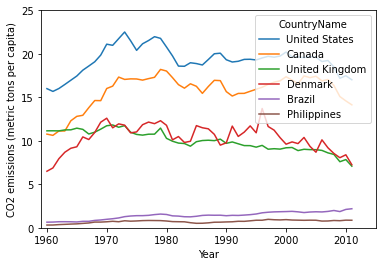

In [15]:
# line plot
plt.figure()
sns.lineplot(data=co2_emissions_df, x='Year', y='Value', hue='CountryName')
plt.xlabel('Year')
plt.ylabel(co2_emissions_df['IndicatorName'].iloc[0])
plt.axis([1959, 2015, 0, 25])

# Life Expectancy

Next we'll look at life expectancy and how it's differs for males versus females.

In [16]:
# list of indicators to examine
indicators = ['Life expectancy at birth, male', 'Life expectancy at birth, female']
# list of countries
countries = ['United States', 'Denmark', 'Philippines']
#countries = 'United States'

In [17]:
# initialize dataframe to store CO2 emission data
life_expectancy = pd.DataFrame()

for country in countries:
    # boolean mask
    mask1 = data['CountryName'].str.contains(country)
    
    for indicator in indicators:
        # boolean mask
        mask2 = data['IndicatorName'].str.contains(indicator)
        data_subset = data[mask1 & mask2]
        # concatenate dataframe with each country's data
        life_expectancy = pd.concat([life_expectancy, data_subset],
                                       ignore_index=True, sort=False)

In [18]:
life_expectancy.tail()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
319,Philippines,PHL,"Life expectancy at birth, female (years)",SP.DYN.LE00.FE.IN,2009,71.081
320,Philippines,PHL,"Life expectancy at birth, female (years)",SP.DYN.LE00.FE.IN,2010,71.214
321,Philippines,PHL,"Life expectancy at birth, female (years)",SP.DYN.LE00.FE.IN,2011,71.349
322,Philippines,PHL,"Life expectancy at birth, female (years)",SP.DYN.LE00.FE.IN,2012,71.490
323,Philippines,PHL,"Life expectancy at birth, female (years)",SP.DYN.LE00.FE.IN,2013,71.636


Time to visualize the data. We'll try two approaches: matplotlib subplots versus seaborn facetgrid

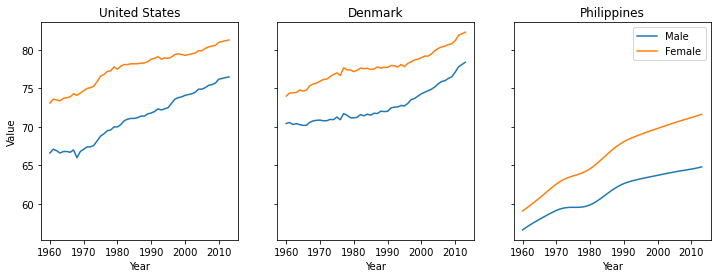

In [43]:
# line plot
fig, axes = plt.subplots(1, len(countries), figsize=(12,4), sharey=True, sharex=True)

axis = 0
for country in countries:
    mask = life_expectancy['CountryName'].str.contains(country)
    sns.lineplot(data=life_expectancy[mask], x='Year', y='Value', 
                 hue='IndicatorName', ax=axes[axis], legend=False)
    axes[axis].title.set_text(country)
    axis += 1
plt.xlabel('Year')

plt.legend(labels=['Male', 'Female'])


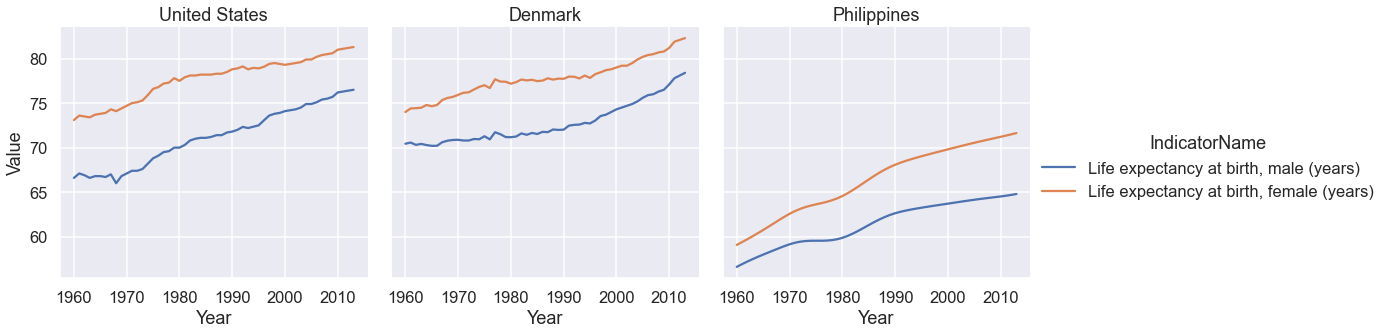

In [52]:
# reset default parameters
sns.set_theme()
# set font size
sns.set_context("talk")
# facetgrid to generate subplots
g = sns.FacetGrid(life_expectancy, col='CountryName', hue='IndicatorName', sharey=True, sharex=True,
                 height=5, aspect=1)
g.map(sns.lineplot, 'Year', 'Value')
g.set_titles(col_template="{col_name}")
g.add_legend()